In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba

/Users/ElliotKim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


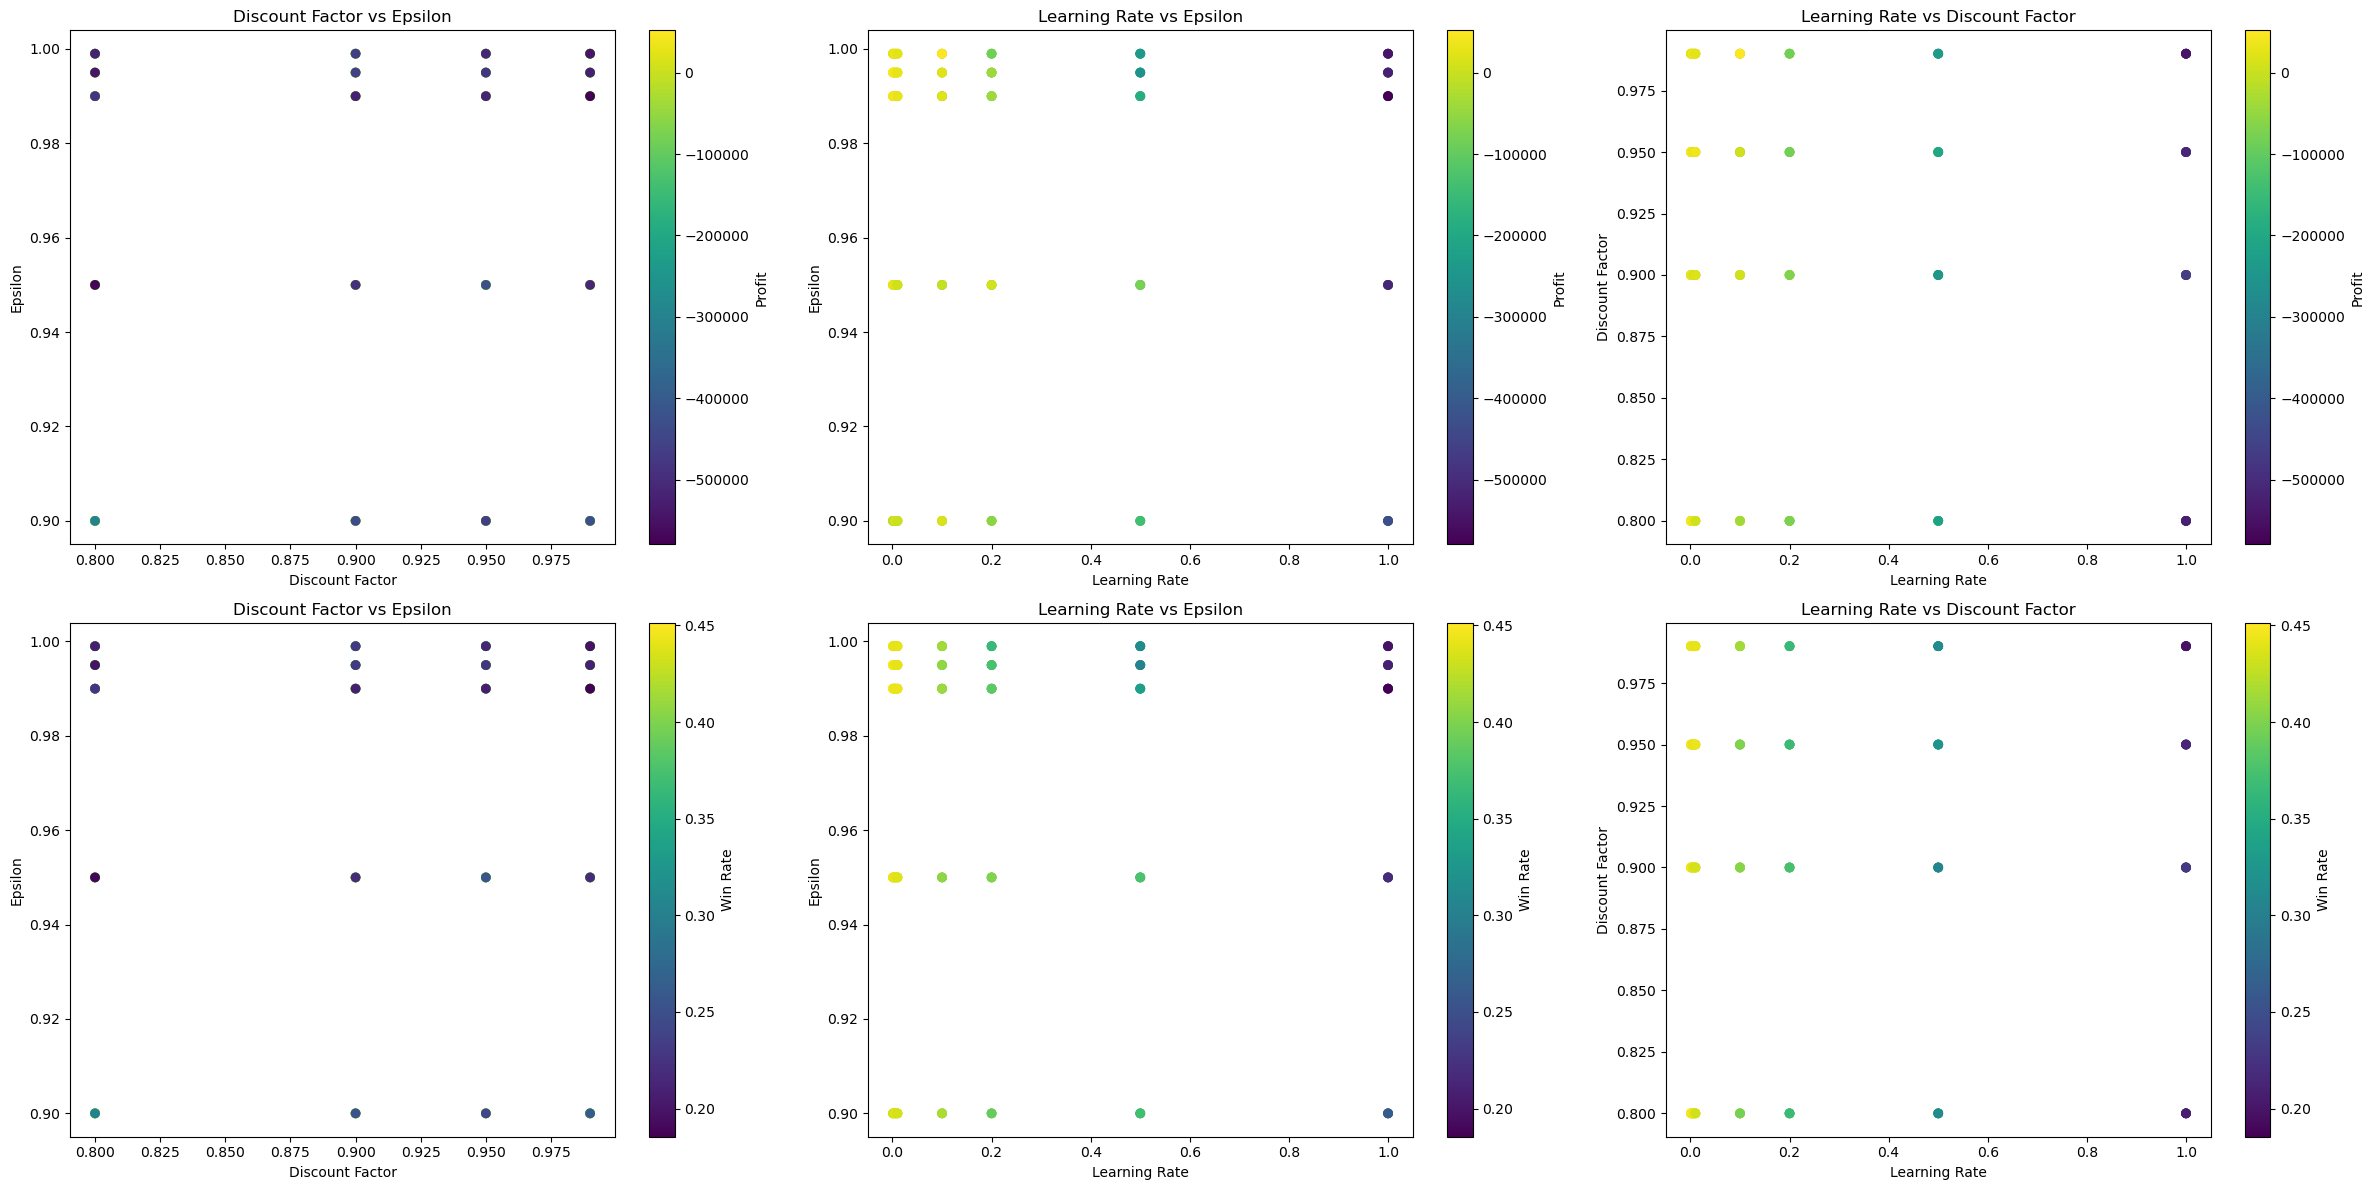

In [5]:
data = pd.read_csv('grid_search.csv')
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
s1 = axes[0, 0].scatter(x=data['discount_factor'], y=data['epsilon'], c=data['profit'])
axes[0, 0].set_title("Discount Factor vs Epsilon")
axes[0, 0].set_xlabel("Discount Factor")
axes[0, 0].set_ylabel("Epsilon")
cbar1 = fig.colorbar(s1, ax=axes[0, 0], orientation='vertical')
cbar1.set_label("Profit")

s2 = axes[0, 1].scatter(x=data['learning_rate'], y=data['epsilon'], c=data['profit'])
axes[0, 1].set_title("Learning Rate vs Epsilon")
axes[0, 1].set_xlabel("Learning Rate")
axes[0, 1].set_ylabel("Epsilon")
cbar2 = fig.colorbar(s2, ax=axes[0, 1], orientation='vertical')
cbar2.set_label("Profit")

s3 = axes[0, 2].scatter(x=data['learning_rate'], y=data['discount_factor'], c=data['profit'])
axes[0, 2].set_title("Learning Rate vs Discount Factor")
axes[0, 2].set_xlabel("Learning Rate")
axes[0, 2].set_ylabel("Discount Factor")
cbar3 = fig.colorbar(s3, ax=axes[0, 2], orientation='vertical')
cbar3.set_label("Profit")

s4 = axes[1, 0].scatter(x=data['discount_factor'], y=data['epsilon'], c=data['win_rate'])
axes[1, 0].set_title("Discount Factor vs Epsilon")
axes[1, 0].set_xlabel("Discount Factor")
axes[1, 0].set_ylabel("Epsilon")
cbar4 = fig.colorbar(s4, ax=axes[1, 0], orientation='vertical')
cbar4.set_label("Win Rate")

s5 = axes[1, 1].scatter(x=data['learning_rate'], y=data['epsilon'], c=data['win_rate'])
axes[1, 1].set_title("Learning Rate vs Epsilon")
axes[1, 1].set_xlabel("Learning Rate")
axes[1, 1].set_ylabel("Epsilon")
cbar5 = fig.colorbar(s5, ax=axes[1, 1], orientation='vertical')
cbar5.set_label("Win Rate")

s6 = axes[1, 2].scatter(x=data['learning_rate'], y=data['discount_factor'], c=data['win_rate'])
axes[1, 2].set_title("Learning Rate vs Discount Factor")
axes[1, 2].set_xlabel("Learning Rate")
axes[1, 2].set_ylabel("Discount Factor")
cbar6 = fig.colorbar(s6, ax=axes[1, 2], orientation='vertical')
cbar6.set_label("Win Rate")
plt.savefig("analyze_grid_search.png")
plt.tight_layout()
plt.show()


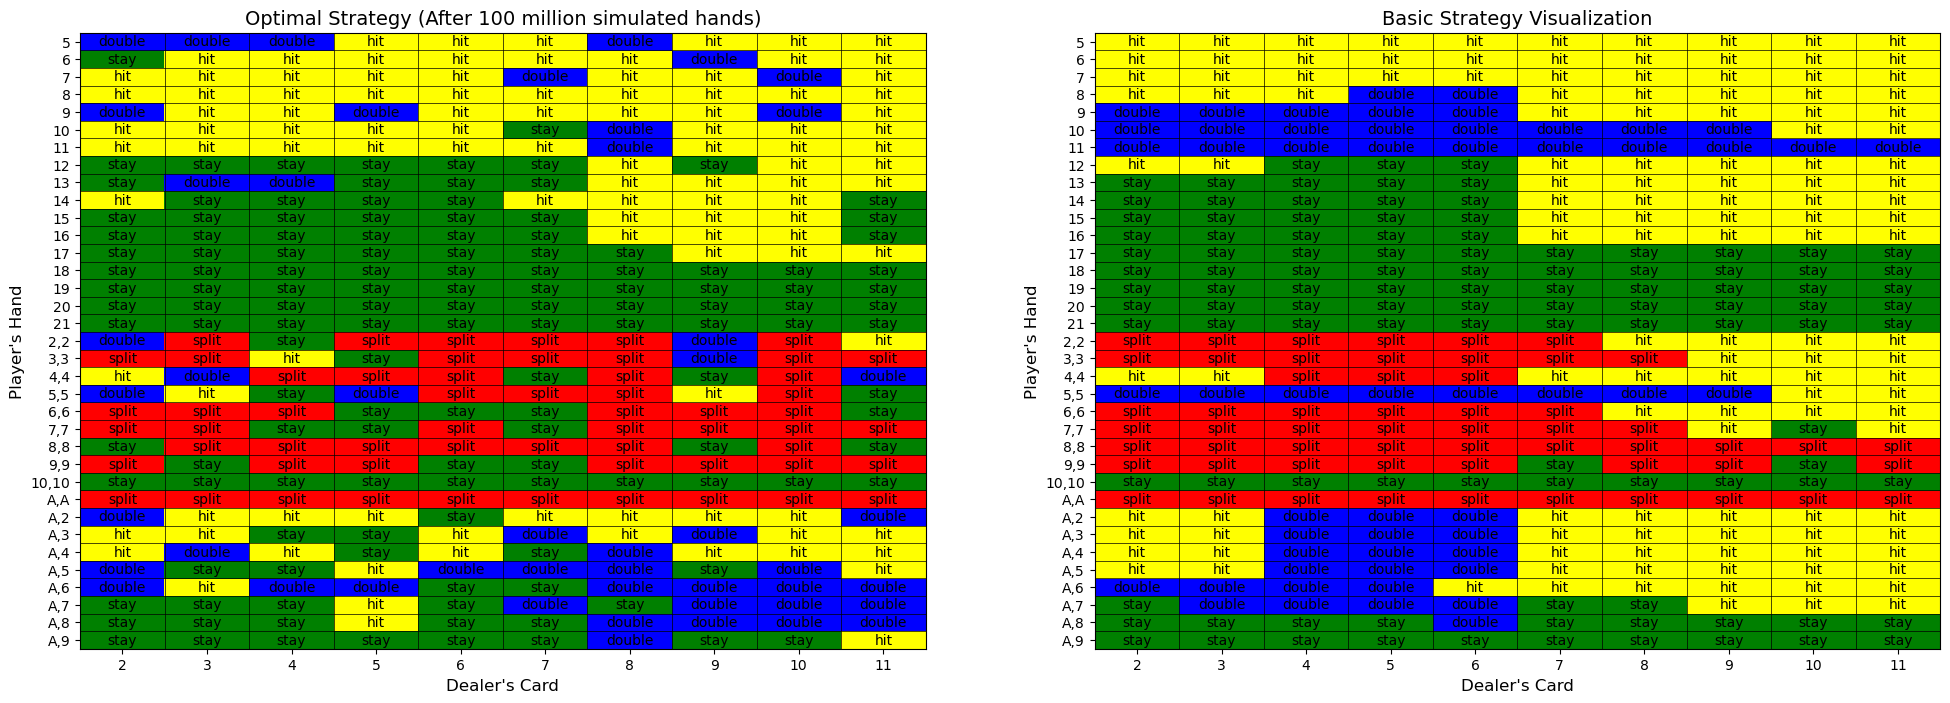

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
ax = axes[0]
df = pd.read_csv('optimal_policy.csv')
pivot_table = df.pivot(index='player', columns='dealer', values='optimal')
reordered_index = (
    [str(i) for i in range(5, 22)] + 
    [f"{i},{i}" for i in range(2, 11)] + ['A,A'] + 
    [f"A,{i}" for i in range(2, 10)]
)
pivot_table = pivot_table.reindex(reordered_index)
strategy_colors = {"hit": "yellow", "stay": "green", "split": "red", "double": "blue"}
#Received Assistance from ChatGPT for plotting.
rgba_matrix = np.array([
    [to_rgba(strategy_colors.get(cell, "white")) for cell in row]
    for row in pivot_table.fillna("").values
])
ax.imshow(rgba_matrix, aspect="auto")
for i in range(pivot_table.shape[0]):
    for j in range(pivot_table.shape[1]):
        if not pd.isna(pivot_table.iloc[i, j]):
            ax.text(j, i, pivot_table.iloc[i, j], ha="center", va="center", color="black", fontsize=10)
ax.set_xticks(np.arange(pivot_table.shape[1]))
ax.set_yticks(np.arange(pivot_table.shape[0]))
ax.set_xticklabels(pivot_table.columns, fontsize=10)
ax.set_yticklabels(pivot_table.index, fontsize=10)
ax.set_xlabel("Dealer's Card", fontsize=12)
ax.set_ylabel("Player's Hand", fontsize=12)
ax.set_title("Optimal Strategy (After 100 million simulated hands)", fontsize=14)
ax.set_xticks(np.arange(-0.5, pivot_table.shape[1]), minor=True)
ax.set_yticks(np.arange(-0.5, pivot_table.shape[0]), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)
ax = axes[1]
df = pd.read_csv('basic_strat.csv')
pivot_table = df.pivot(index='player', columns='dealer', values='optimal')
pivot_table = pivot_table.reindex(reordered_index)
strategy_colors = {"hit": "yellow", "stay": "green", "split": "red", "double": "blue"}
rgba_matrix = np.array([
    [to_rgba(strategy_colors.get(cell, "white")) for cell in row]
    for row in pivot_table.fillna("").values
])
ax.imshow(rgba_matrix, aspect="auto")
for i in range(pivot_table.shape[0]):
    for j in range(pivot_table.shape[1]):
        if not pd.isna(pivot_table.iloc[i, j]):
            ax.text(j, i, pivot_table.iloc[i, j], ha="center", va="center", color="black", fontsize=10)

ax.set_xticks(np.arange(pivot_table.shape[1]))
ax.set_yticks(np.arange(pivot_table.shape[0]))
ax.set_xticklabels(pivot_table.columns, fontsize=10)
ax.set_yticklabels(pivot_table.index, fontsize=10)
ax.set_xlabel("Dealer's Card", fontsize=12)
ax.set_ylabel("Player's Hand", fontsize=12)
ax.set_title("Basic Strategy Visualization", fontsize=14)
ax.set_xticks(np.arange(-0.5, pivot_table.shape[1]), minor=True)
ax.set_yticks(np.arange(-0.5, pivot_table.shape[0]), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)
plt.savefig('compare_policy.png')
plt.show()

In [8]:
merged_df = pd.read_csv('merged.csv')
count_df = merged_df.value_counts(subset=['optimal_learner', 'optimal_basic']).reset_index()
correct = count_df[(count_df['optimal_learner']==count_df['optimal_basic'])]['count'].sum()
correct_perc = round(correct/len(merged_df)*100,2)
print(f"Out of {len(merged_df)} states, {correct_perc}% of the time, the Q-learner had the same optimal policy as the basic strategy table.")

Out of 350 states, 61.14% of the time, the Q-learner had the same optimal policy as the basic strategy table.


In [9]:
count_df

,optimal_learner,optimal_basic,count
0,stay,stay,92
1,hit,hit,70
2,split,split,42
3,double,hit,30
4,hit,double,30
5,stay,hit,19
6,stay,split,13
7,split,hit,12
8,stay,double,11
9,double,double,10
